In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
advertising=pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertising.shape

(200, 4)

In [7]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


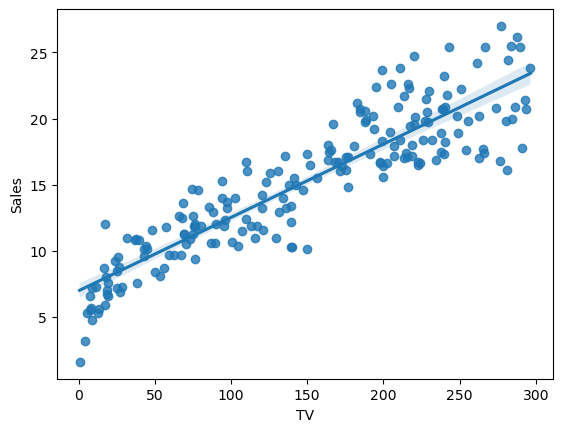

In [12]:
# visualize the data 
sns.regplot(x='TV',y='Sales',data=advertising)
plt.show()

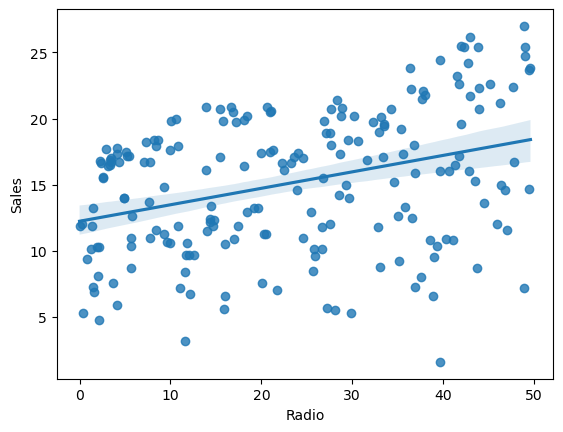

In [13]:
sns.regplot(x='Radio',y='Sales',data=advertising)
plt.show()

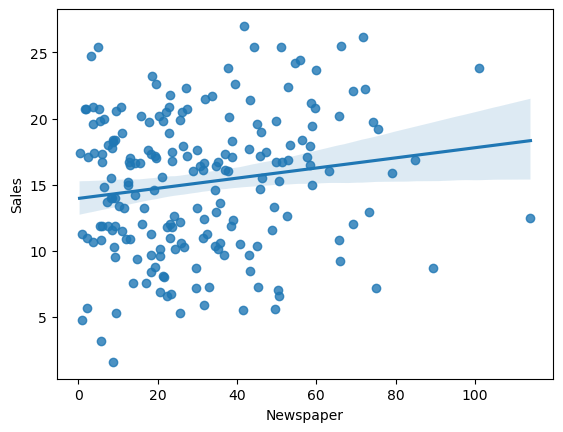

In [14]:
sns.regplot(x='Newspaper',y='Sales',data=advertising)
plt.show()

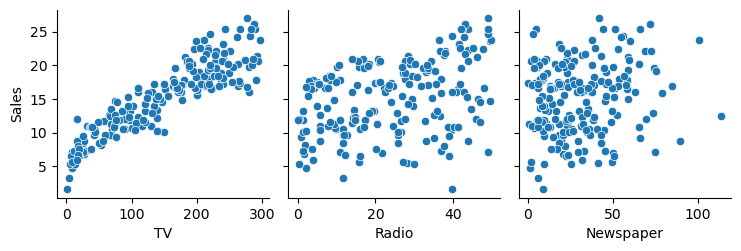

In [15]:
# Comparing all three plots
sns.pairplot(data=advertising, x_vars=['TV','Radio','Newspaper'],y_vars='Sales')
plt.show()

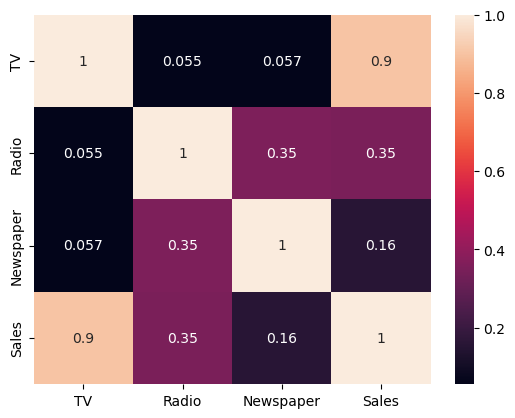

In [20]:
advertising.corr()
sns.heatmap(advertising.corr(),annot=True)
plt.show()

# lets perform some simple linear regression

In [24]:
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split

Steps:
- create x and y
- create train and test sets (70-30,80-20)
- train your model on the training set(i.E learn the coefficients)
- Evaluate the model(training set, test set)

In [22]:
# create x and y
x=advertising['TV']
y=advertising['Sales']

In [25]:
# train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.70,random_state=100)

In [26]:
# training the model
x_train.head()

68     237.4
188    286.0
156     93.9
30     292.9
106     25.0
Name: TV, dtype: float64

In [27]:
x_train_sm=sm.add_constant(x_train)
x_train_sm.head()

,const,TV
68,1.0,237.4
188,1.0,286.0
156,1.0,93.9
30,1.0,292.9
106,1.0,25.0


In [31]:
# firring the model
lr=sm.OLS(y_train,x_train_sm)
lr_model= lr.fit()

In [32]:
lr_model.params

const    6.054388
TV       0.062969
dtype: float64

In [33]:
# so here Sales= 6.94+ .05(TV)

In [34]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     436.6
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.13e-28
Time:                        14:33:24   Log-Likelihood:                -130.28
No. Observations:                  60   AIC:                             264.6
Df Residuals:                      58   BIC:                             268.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0544      0.487     12.421      0.000       5.079       7.030
TV             0.0630      0.003     20.894      0.000       0.057       0.069
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.353
Skew:                           0.091   Prob(JB):                        0.838
Kurtosis:                       2.671   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. coef and p-value
2. R-squared is 81.6 %, very high
3. p (F-statistic) is low which mean the fit is not purely by chance

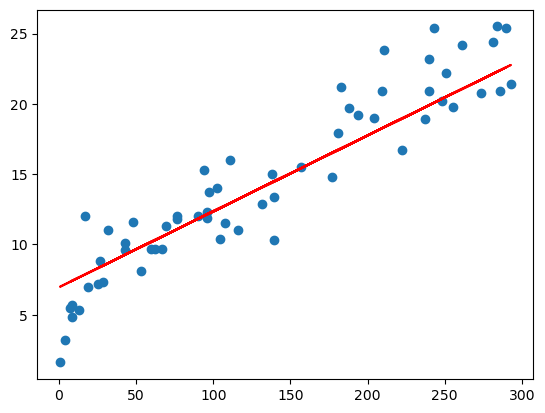

In [37]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.948+0.054*x_train,'r')
plt.show()

## Residual Analysis

In [38]:
# error=f(y_train, y_train_pred)
y_train_pred=lr_model.predict(x_train_sm)
y_train_pred

68     21.003310
188    24.063620
156    11.967209
30     24.498108
106     7.628622
13     12.193899
72      7.741967
17     23.773961
18     10.411867
38      8.768367
109    22.136758
47     21.160733
113    19.252762
56      6.514065
27     21.173327
63     12.521340
147    21.368532
105    14.737860
121     7.238212
2       7.137461
80     10.865246
186    14.838611
61     22.508277
49     10.267037
135     9.095808
197    17.199962
91      7.855312
4      17.439245
100    20.058770
141    18.251550
129     9.807361
159    14.347450
132     6.583331
108     6.879287
155     6.312563
130     6.098467
86     10.858949
93     21.853396
137    23.289097
144    12.112039
58     19.328325
60      9.423248
107    11.746817
143    12.640981
198    23.912493
34     12.080554
14     18.906431
66      8.037923
53     17.552590
98     24.296606
180    15.915387
94     12.817296
138     8.762070
176    21.695972
79     13.358832
87     13.025094
103    17.886327
67     14.826017
24      9.9773

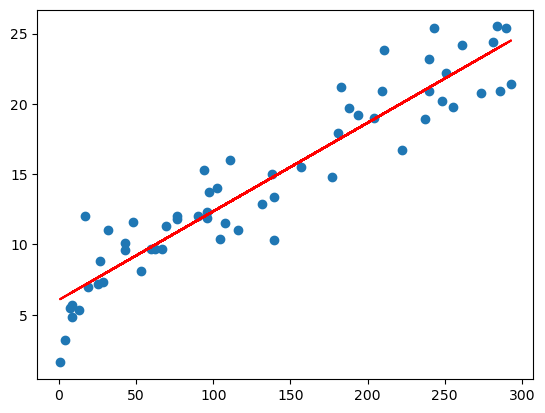

In [39]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_train_pred,'r')
plt.show()

In [40]:
res=y_train - y_train_pred

<Figure size 640x480 with 0 Axes>

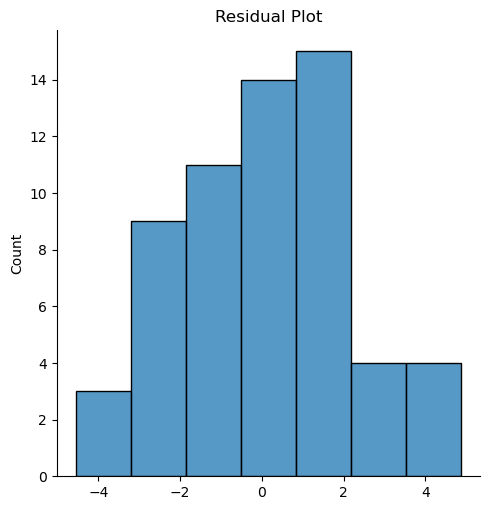

In [42]:
# ploting the residuals
plt.figure()
sns.displot(res)
plt.title("Residual Plot")
plt.show()

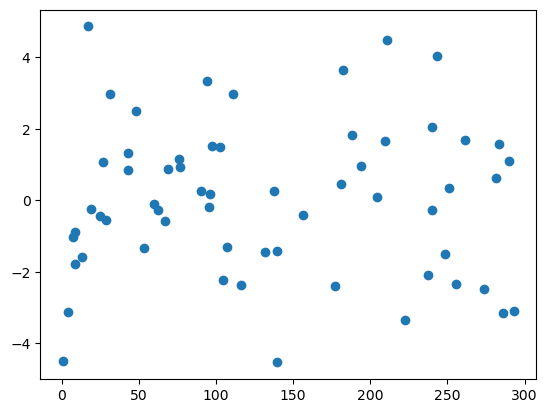

In [43]:
# looking for patterns in residuals,(we should not able to indentify and solid pattern)
plt.scatter(x_train,res)
plt.show()

# Predictions and Evaluation on the test set

steps:
- predictions on test set(y_test_pred)
- evaluate the model, r-squared ,on the test

In [46]:
# prediction on test
x_test_sm=sm.add_constant(x_test)
y_test_pred=lr_model.predict(x_test_sm)

y_test_pred

126     6.545549
104    21.053685
99     14.567843
92     19.762814
111    21.274078
         ...    
179    16.482111
145    14.888987
0      20.543633
78      6.394423
166     7.181540
Length: 140, dtype: float64

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [50]:
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2*100

73.10400426976635

In [51]:
# on test set
r2=r2_score(y_true=y_train,y_pred=y_train_pred)
r2*100

88.27228437047613

In [52]:
# mean square error
mean_squared_error(y_true=y_test,y_pred=y_test_pred)
# the lower it is the better it is

6.161630420610488

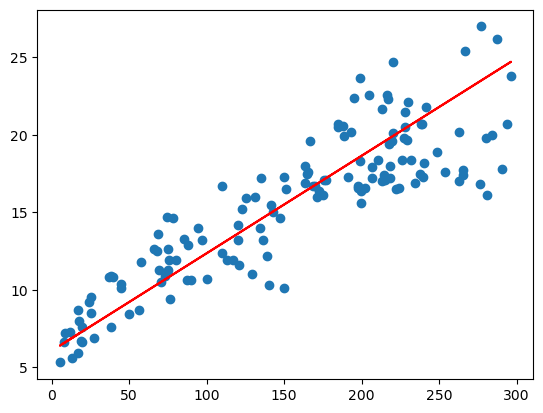

In [53]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_test_pred,'r')
plt.show()

# Using SKLearn  lib

In [54]:
# train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.70,random_state=100)

## Steps in Sklearn model building
1. create an obejct of linear regression
2. fit the model
3. see the parameters , make predictions(train, test)
4. evalute

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
# step 1
lm=LinearRegression()

In [57]:
# step 2
lm.fit(x_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[237.4 286.   93.9 292.9  25.   97.5  26.8 281.4  69.2  43.1 255.4 239.9
 209.6   7.3 240.1 102.7 243.2 137.9  18.8  17.2  76.4 139.5 261.3  66.9
  48.3 177.   28.6 180.8 222.4 193.7  59.6 131.7   8.4  13.1   4.1   0.7
  76.3 250.9 273.7  96.2 210.8  53.5  90.4 104.6 283.6  95.7 204.1  31.5
 182.6 289.7 156.6 107.4  43.  248.4 116.  110.7 187.9 139.3  62.3   8.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [58]:
#as above statement is giving error because the shape of x_train is 1D form i.e (140,0) or (n,0) so lets reshape 
# same for x_test set
x_train_lm=x_train.values.reshape(-1,1)
x_test_lm=x_test.values.reshape(-1,1)

In [59]:
# trying now after resolving
lm.fit(x_train_lm,y_train)

LinearRegression()

In [61]:
help(lm)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [63]:
# step 3
print(lm.coef_) # this gives the slope value
print(lm.intercept_)

[0.06296934]
6.05438843525191


In [64]:
# making predictions
y_test_pred=lm.predict(x_train_lm)
y_test_pred=lm.predict(x_test_lm)


In [66]:
print(r2_score(y_true=y_train,y_pred=y_train_pred)*100)
print(r2_score(y_true=y_test,y_pred=y_test_pred)*100)

88.27228437047613
73.10400426976639
